In [ ]:
# !pip install metrics
# !pip install dataloader
# !pip install lightgbm

In [1]:
%%writefile dataloader.py
import pandas as pd

def load_dataset():
    # load dataset
    data = pd.read_csv('dataset/train_result.csv')
    # 컬럼명 소문자로 변경
    data.columns = data.columns.str.lower()
    # target 컬럼을 y로, 나머지를 X로
    X = data.drop(columns='churn')
    y = data['churn']
    
    return X, y
    

Overwriting dataloader.py


In [2]:
from sklearn.model_selection import train_test_split
from dataloader import load_dataset
from sklearn.model_selection import train_test_split

X, y = load_dataset()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

DecisionTreeClassifier 

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
dt_model.fit(X_train_scaled, y_train)

# Validate on validation set
y_valid_pred_dt = dt_model.predict(X_valid_scaled)
f1_dt = f1_score(y_valid, y_valid_pred_dt)
classification_rep_dt = classification_report(y_valid, y_valid_pred_dt)
conf_matrix_dt = confusion_matrix(y_valid, y_valid_pred_dt)
roc_auc_dt = roc_auc_score(y_valid, dt_model.predict_proba(X_valid_scaled)[:, 1])

# Display results
print("F1 Score:", f1_dt)
print("Classification Report:\n", classification_rep_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("ROC-AUC Score:", roc_auc_dt)

F1 Score: 0.41683899556868537
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.60      0.67      6658
           1       0.34      0.53      0.42      2671

    accuracy                           0.58      9329
   macro avg       0.55      0.56      0.54      9329
weighted avg       0.64      0.58      0.60      9329

Confusion Matrix:
 [[3970 2688]
 [1260 1411]]
ROC-AUC Score: 0.5981627201097106


In [8]:
#f1 점수를 따졌을 때 제일 높은 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Random Forest 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# 검증 데이터로 평가
y_valid_pred = rf_model.predict(X_valid_scaled)
f1 = f1_score(y_valid, y_valid_pred)
classification_rep = classification_report(y_valid, y_valid_pred)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
roc_auc = roc_auc_score(y_valid, rf_model.predict_proba(X_valid_scaled)[:, 1])

# 결과 출력
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC Score:", roc_auc)

F1 Score: 0.46174496644295304
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.63      0.70      6658
           1       0.38      0.58      0.46      2671

    accuracy                           0.61      9329
   macro avg       0.59      0.60      0.58      9329
weighted avg       0.67      0.61      0.63      9329

Confusion Matrix:
 [[4172 2486]
 [1123 1548]]
ROC-AUC Score: 0.6478721476819154


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score

# Gradient Boosting Classifier 모델 학습
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# 검증 데이터 평가
y_valid_pred_gb = gb_model.predict(X_valid_scaled)
f1_gb = f1_score(y_valid, y_valid_pred_gb)
classification_rep_gb = classification_report(y_valid, y_valid_pred_gb)
conf_matrix_gb = confusion_matrix(y_valid, y_valid_pred_gb)
roc_auc_gb = roc_auc_score(y_valid, gb_model.predict_proba(X_valid_scaled)[:, 1])

# 결과 출력
print("F1 Score:", f1_gb)
print("Classification Report:\n", classification_rep_gb)
print("Confusion Matrix:\n", conf_matrix_gb)
print("ROC-AUC Score:", roc_auc_gb)

F1 Score: 0.17418944691671964
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.83      6658
           1       0.58      0.10      0.17      2671

    accuracy                           0.72      9329
   macro avg       0.65      0.54      0.50      9329
weighted avg       0.69      0.72      0.64      9329

Confusion Matrix:
 [[6457  201]
 [2397  274]]
ROC-AUC Score: 0.663851663096132


In [26]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score

# Train LGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_scaled, y_train)

# Validate on validation set
y_valid_pred_lgbm = lgbm_model.predict(X_valid_scaled)
f1_lgbm = f1_score(y_valid, y_valid_pred_lgbm)
classification_rep_lgbm = classification_report(y_valid, y_valid_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_valid, y_valid_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_valid, lgbm_model.predict_proba(X_valid_scaled)[:, 1])

# Display results
print("F1 Score:", f1_lgbm)
print("Classification Report:\n", classification_rep_lgbm)
print("Confusion Matrix:\n", conf_matrix_lgbm)
print("ROC-AUC Score:", roc_auc_lgbm)

[LightGBM] [Info] Number of positive: 8013, number of negative: 19972
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2881
[LightGBM] [Info] Number of data points in the train set: 27985, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286332 -> initscore=-0.913266
[LightGBM] [Info] Start training from score -0.913266
F1 Score: 0.16159025328630972
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.83      6658
           1       0.56      0.09      0.16      2671

    accuracy                           0.72      9329
   macro avg       0.65      0.53      0.50      9329
weighted avg       0.68      0.72      0.64      9329

Confusion Matrix:
 [[6462  196]
 [2419  252]]
ROC-AUC Score: 0

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score

# Train K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors
knn_model.fit(X_train_scaled, y_train)

# Validate on validation set
y_valid_pred_knn = knn_model.predict(X_valid_scaled)
f1_knn = f1_score(y_valid, y_valid_pred_knn)
classification_rep_knn = classification_report(y_valid, y_valid_pred_knn)
conf_matrix_knn = confusion_matrix(y_valid, y_valid_pred_knn)
roc_auc_knn = roc_auc_score(y_valid, knn_model.predict_proba(X_valid_scaled)[:, 1])

# Display results
print("F1 Score:", f1_knn)
print("Classification Report:\n", classification_rep_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("ROC-AUC Score:", roc_auc_knn)

F1 Score: 0.21530864197530863
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78      6658
           1       0.32      0.16      0.22      2671

    accuracy                           0.66      9329
   macro avg       0.52      0.51      0.50      9329
weighted avg       0.60      0.66      0.62      9329

Confusion Matrix:
 [[5715  943]
 [2235  436]]
ROC-AUC Score: 0.523255409868846


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score

# Logistic Regression 모델 학습
logreg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=500)
logreg_model.fit(X_train_scaled, y_train)

# 검증 데이터 평가
y_valid_pred_logreg = logreg_model.predict(X_valid_scaled)
f1_logreg = f1_score(y_valid, y_valid_pred_logreg)
classification_rep_logreg = classification_report(y_valid, y_valid_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_valid, y_valid_pred_logreg)
roc_auc_logreg = roc_auc_score(y_valid, logreg_model.predict_proba(X_valid_scaled)[:, 1])

# 결과 출력
print("F1 Score:", f1_logreg)
print("Classification Report:\n", classification_rep_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)
print("ROC-AUC Score:", roc_auc_logreg)

F1 Score: 0.4401646574536901
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.60      0.68      6658
           1       0.36      0.56      0.44      2671

    accuracy                           0.59      9329
   macro avg       0.57      0.58      0.56      9329
weighted avg       0.66      0.59      0.61      9329

Confusion Matrix:
 [[4024 2634]
 [1174 1497]]
ROC-AUC Score: 0.6028884161165411


In [10]:
#이중 f1점수가 가장 높았던 RF로 RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Random Forest 모델 초기화
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # 탐색할 설정 수
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 학습 수행
random_search.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 및 성능 출력
best_params = random_search.best_params_
best_score = random_search.best_score_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [11]:
## Best parameter 확인
print("RandomForestClassifier Best parameters:", random_search.best_params_)
# print("XGBClassifier Best parameters:", random_search_xgb.best_params_)

RandomForestClassifier Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 5, 'class_weight': 'balanced_subsample', 'bootstrap': True}


In [12]:
print("RandomForestClassifier Best score:", random_search.best_score_)
# print("XGBClassifier Best score:", random_search_xgb.best_score_)

RandomForestClassifier Best score: 0.4756734519287527


In [16]:
best_RF = random_search.best_estimator_
# best_xgb = random_search_xgb.best_estimator_

In [17]:
import joblib
import os

os.makedirs('models', exist_ok=True)

In [18]:
import joblib
joblib.dump(best_RF, 'models/best_RF.pkl')
# joblib.dump(best_xgb, 'models/best_xgb.pkl')

print("Models saved successfully.")

Models saved successfully.


In [10]:
from joblib import dump, load

best_dtree = load('models/best_dtree.pkl')
best_xgb = load('models/best_xgb.pkl')


In [24]:
best_models = [
    ("RandomForestClassifier", best_RF),
    # ("XGBClassifier", best_xgb)
]

test_results = {}

for name, model in best_models:
    print(f"평가 {name}...")
    pred_test = model.predict(X_test_scaled)
    pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]

    accuracy_test = accuracy_score(y_test, pred_test)
    precision_test = precision_score(y_test, pred_test)
    recall_test = recall_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)
    auc_test = roc_auc_score(y_test, pred_proba_test)
    
    test_results[name] = [accuracy_test, precision_test, recall_test, f1_test, auc_test]

평가 RandomForestClassifier...


In [25]:
pd.DataFrame(test_results, index=['accuracy', 'precision', 'recall', 'f1', 'roc-auc'])

,RandomForestClassifier
accuracy,0.533205
precision,0.350751
recall,0.740803
f1,0.476087
roc-auc,0.643545


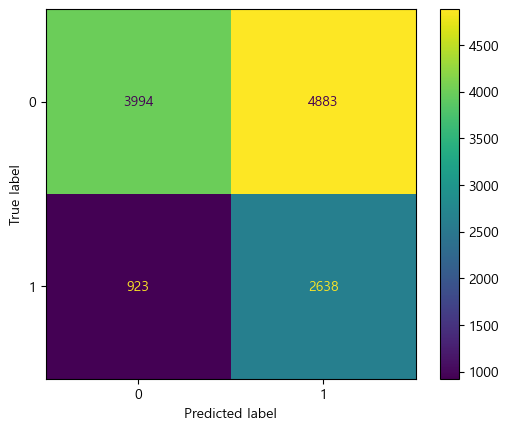

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay(cm).plot()